In [2]:
from google.cloud import vision
YOUR_SERVICE = 'gen-lang-client-0000496465-a25308522ddc.json'
client = vision.ImageAnnotatorClient.from_service_account_json(YOUR_SERVICE)

In [3]:
YOUR_PIC = 'some_plate.jpg'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [4]:
response = client.object_localization(image=image)

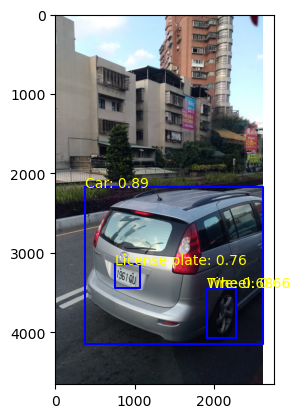

In [5]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)

plt.imshow(im)

w, h = im.size
for obj in response.localized_object_annotations:
    desc = f'{obj.name}: {obj.score:.2f}'
    a = [(v.x * w, v.y * h) for v in obj.bounding_poly.normalized_vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')
    plt.text(x[0], y[0], desc, color='yellow')

plt.show()

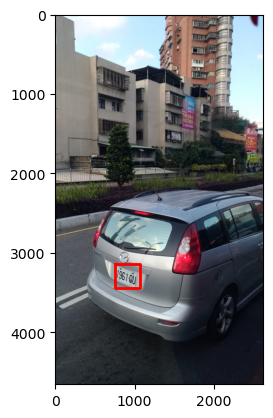

In [8]:
width, height = im.size
x , y = [],[]

# 找出車子範圍
for obj in response.localized_object_annotations:
    if obj.name == "License plate":
        for pst in obj.bounding_poly.normalized_vertices:
            x.append(pst.x)
            y.append(pst.y)
x.append(x[0])
y.append(y[0])

x_original = [int(x * width) for x in x]
y_original = [int(y * height) for y in y]

# 畫圖
fig, ax = plt.subplots()
ax.imshow(im)
plt.plot(x_original, y_original, 'r-', linewidth=2)
plt.show()




In [10]:
# 儲存車圖片
x_min = min(x_original)
x_max = max(x_original)
y_min = min(y_original)
y_max = max(y_original)

# 裁切圖片
car_image = im.crop((x_min, y_min, x_max, y_max))

In [11]:
from io import BytesIO

buf = BytesIO()
# 儲存裁切後的圖片
car_image.save(buf,format='JPEG')  # 您可以修改儲存的檔名和格式

In [12]:
# 讀取car_croppe圖片
image = vision.Image(content=buf.getvalue())

In [22]:
response = client.text_detection(image=image)
response.text_annotations[0].description

'1961 QU'